# Research Question 1 - Does investor attention (from Google Trends) align with trading volume?

- Do trends in attention-related keywords correlate with, or precede, changes in stock or ETF trading volume?

- Is there any predictive or causal relationship between attention and volume?

#### Code

In [1]:
# If you have never used pytrends, you should install it
#!pip install pytrends

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # or 'Noto Sans CJK TC'
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
from pytrends.request import TrendReq
import yfinance as yf
import time

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
attention_index_df = pd.read_excel('attention_index_data.xlsx', index_col=0)
merged_df = pd.read_excel('merged_df.xlsx', index_col=0)

## Time Series Trend Analysis

To investigate whether investor attention aligns with or predicts trading activity (RQ1), we generate separate time series plots for each thematic attention index alongside the normalized trading volumes of its related stocks. By isolating each attention index and its corresponding tickers in individual figures, we gain a clearer visual understanding of co-movement patterns without the visual clutter of overlapping themes. This disaggregated view allows us to detect whether attention surges (e.g., search spikes in ETF-related keywords) precede or coincide with volume spikes in associated tickers. Such visual diagnostics offer preliminary insights into the potential behavioral link between retail investor attention and market participation, forming the basis for subsequent statistical tests of correlation and causality.

#### Code

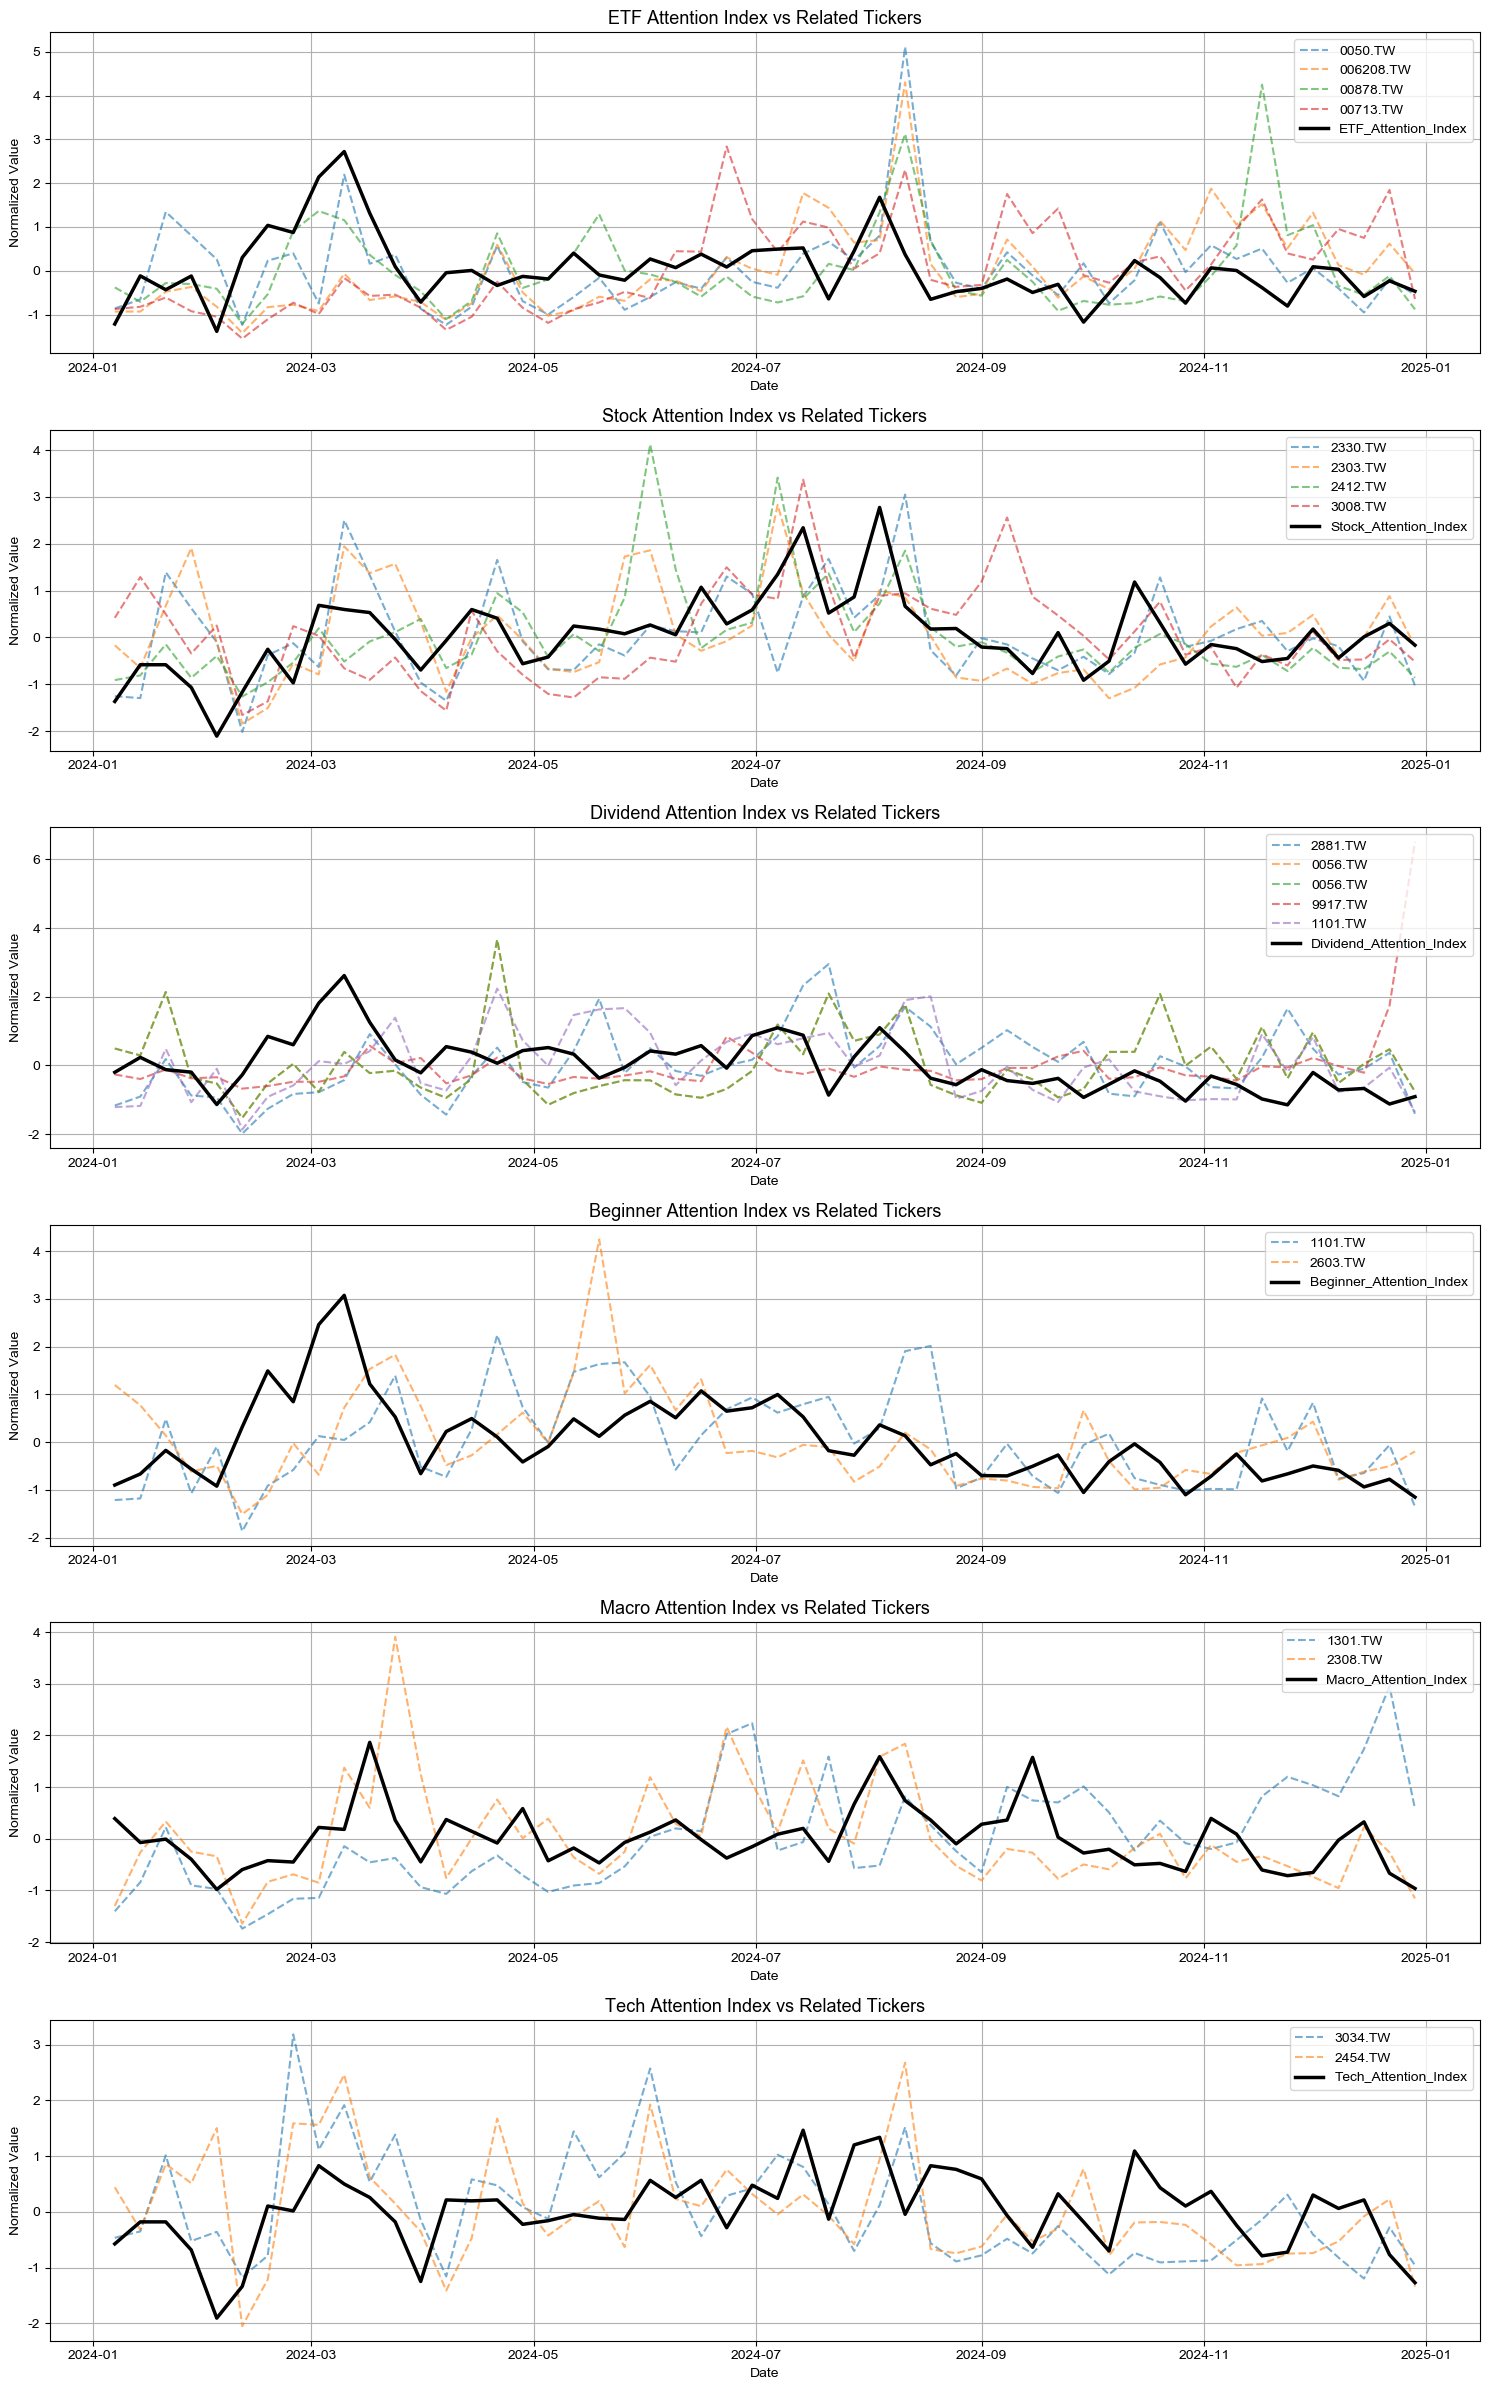

In [3]:
# Define which 2 tickers match each attention index
index_ticker_map = {
    'ETF_Attention_Index': ['0050.TW', '006208.TW', '00878.TW', '00713.TW'],
    'Stock_Attention_Index': ['2330.TW', '2303.TW', '2412.TW', '3008.TW'],
    'Dividend_Attention_Index': ['2881.TW', '0056.TW', '0056.TW', '9917.TW', '1101.TW'],
    'Beginner_Attention_Index': ['1101.TW', '2603.TW'],
    'Macro_Attention_Index': ['1301.TW', '2308.TW'],
    'Tech_Attention_Index': ['3034.TW', '2454.TW']
}

plt.figure(figsize=(15, 24))
for i, (att_col, tickers) in enumerate(index_ticker_map.items()):
    plt.subplot(6, 1, i + 1)
    
    # Plot 2 related stocks
    for ticker in tickers:
        vol_col = f"{ticker}_Volume_norm"
        if vol_col in merged_df.columns:
            plt.plot(merged_df.index, merged_df[vol_col], label=ticker, linestyle='--', alpha=0.6)
    
    # Plot attention index
    if att_col in merged_df.columns:
        plt.plot(merged_df.index, merged_df[att_col], label=att_col, linewidth=2.5, color='black')
    
    plt.title(f"{att_col.replace('_', ' ')} vs Related Tickers", fontsize=13)
    plt.xlabel("Date")
    plt.ylabel("Normalized Value")
    plt.legend(loc='upper right')
    plt.grid(True)

# Save the plot to the 'graph' folder
plt.tight_layout()
plt.show()

In [4]:
# Creates a folder if it doesn't exist
os.makedirs("graphs", exist_ok=True)

# Loop through each attention index and its related tickers
for i, (att_col, tickers) in enumerate(index_ticker_map.items()):
    plt.figure(figsize=(10, 5))  # Create a new figure for each subplot

    # Plot related tickers' normalized volumes
    for ticker in tickers:
        vol_col = f"{ticker}_Volume_norm"
        if vol_col in merged_df.columns:
            plt.plot(merged_df.index, merged_df[vol_col], label=ticker, linestyle='--', alpha=0.6)

    # Plot the attention index
    if att_col in merged_df.columns:
        plt.plot(merged_df.index, merged_df[att_col], label=att_col, linewidth=2.5, color='black')

    # Customize plot
    plt.title(f"{att_col.replace('_', ' ')} vs Related Tickers", fontsize=13)
    plt.xlabel("Date")
    plt.ylabel("Normalized Value")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()

    # Save each figure individually
    filename = f"graphs/rq1_ts_{att_col}.png"
    plt.savefig(filename, dpi=300)
    plt.close()  # Close the figure to free memory

# Save the plot to the 'graph' folder
plt.tight_layout()
plt.savefig("graphs/rq1_attention_vs_volume.png", dpi=300)

<Figure size 640x480 with 0 Axes>

### Time Series Comparison Between Attention Indexes and Trading Volume of Related Stocks

The figure above illustrates the temporal relationship between six thematic Attention Indexes (constructed from Google Trends) and the normalized trading volumes of associated TWSE-listed stocks throughout 2024. Each subplot corresponds to a different investment theme—ETFs, individual stocks, dividends, beginner-friendly picks, macro-sensitive sectors, and technology. In each case, the black solid line represents the attention index, while dashed colored lines depict the weekly normalized trading volumes of 2–5 related tickers.

Visual inspection reveals several instances of alignment between attention spikes and volume surges, particularly for the ETF and stock-related panels, suggesting that increases in search interest may precede or coincide with trading activity. Notably, attention peaks in March and July often correspond to volume spikes across multiple tickers, supporting the hypothesis that investor attention may be a leading indicator of trading behavior. This preliminary observation motivates further statistical testing for lagged correlation or causal influence, as posed in Research Question 1.

## Correlation Analysis

To quantitatively assess the relationship between investor attention and trading behavior, we compute a Pearson correlation matrix between the attention indexes and the normalized trading volumes of related stocks. Specifically, we extract all columns corresponding to volume and attention, and apply the DataFrame.corrwith() method to measure linear associations across time. The resulting correlation matrix is then visualized using a heatmap, where each cell indicates the strength and direction of correlation between a given stock’s trading volume and an attention index. This approach enables us to identify which themes of investor attention (e.g., dividend-related or macro-related) are most strongly linked to observed trading activity, thus offering an empirical foundation for answering RQ1. High positive correlations suggest that investor interest, as proxied by Google search volume, may co-move or even lead trading volume patterns.

#### Code

,ETF_Attention_Index,Stock_Attention_Index,Dividend_Attention_Index,Beginner_Attention_Index,Macro_Attention_Index,Tech_Attention_Index
Volume,,,,,,
0050.TW_Volume_norm,0.23,0.20,0.14,0.13,0.18,0.14
006208.TW_Volume_norm,0.01,0.36,-0.16,-0.19,0.10,0.20
00878.TW_Volume_norm,0.27,0.15,0.11,0.16,0.11,0.05
00713.TW_Volume_norm,-0.02,0.34,-0.20,-0.12,0.10,0.14
2330.TW_Volume_norm,0.34,0.39,0.27,0.30,0.21,0.27
2303.TW_Volume_norm,0.24,0.32,0.30,0.26,0.20,0.10
2412.TW_Volume_norm,0.14,0.45,0.28,0.28,0.19,0.32
3008.TW_Volume_norm,-0.04,0.36,0.02,-0.08,0.16,0.34
2881.TW_Volume_norm,-0.06,0.44,-0.08,-0.03,0.20,0.31


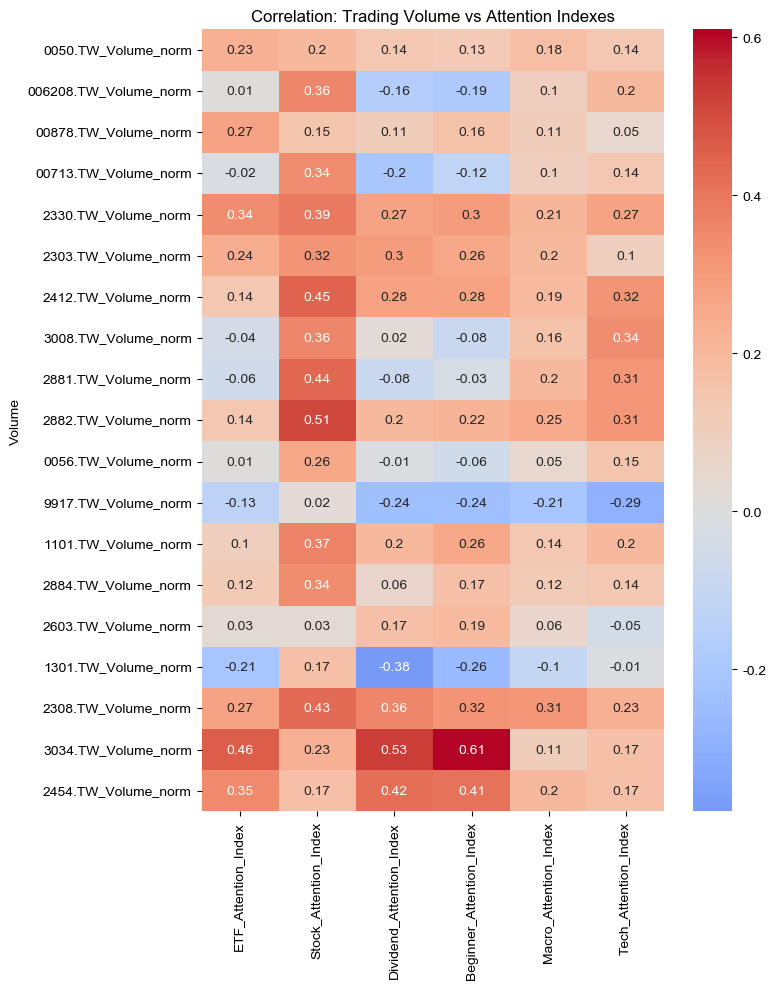

In [7]:
# 1. Select only volume columns
volume_cols = [col for col in merged_df.columns if 'Volume' in col]

# 2. Select only attention index columns
attention_cols = [col for col in merged_df.columns if 'Attention_Index' in col]

# 3. Compute correlation matrix (volume vs attention)
# (Optional) convert to Pearson correlation
corr_df = merged_df[volume_cols].corrwith(merged_df[attention_cols[0]])
for col in attention_cols[1:]:
    corr_df = pd.concat([corr_df, merged_df[volume_cols].corrwith(merged_df[col])], axis=1)
corr_df.columns = attention_cols
corr_df.index.name = 'Volume'
corr_df = corr_df.round(2)

# 4. Save the correlation matrix as CSV
os.makedirs("outputs", exist_ok=True)
corr_df.to_csv("outputs/correlation_matrix.csv")
display(corr_df)

# 5. Plot and save heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation: Trading Volume vs Attention Indexes")
plt.tight_layout()
plt.savefig("outputs/correlation_heatmap.png", dpi=300)
plt.show()

### Interpreting the Link Between Retail Attention and Trading Volume: Evidence from Correlation Patterns

The correlation heatmap reveals varying degrees of association between thematic attention indexes and the normalized trading volumes of corresponding TWSE-listed stocks. Notably, the Beginner Attention Index exhibits the strongest positive correlations, particularly with 3034.TW (r = 0.61), 2454.TW (r = 0.41), and 00878.TW (r = 0.16), suggesting that spikes in beginner-related search interest may coincide with or lead to increased trading activity in these stocks. Similarly, the Stock Attention Index shows moderate-to-strong positive correlations across several stocks, with 2412.TW (r = 0.45), 2882.TW (r = 0.51), and 2881.TW (r = 0.44) standing out, supporting the idea that general retail attention to “stock” topics aligns with actual market behavior. On the other hand, attention indexes tied to macro and tech topics display weaker and more dispersed correlations, implying that these themes may not drive immediate trading volume to the same extent. The observed heterogeneity across themes and tickers highlights the need for further temporal analysis, such as lagged correlations or Granger causality, to better understand whether attention truly precedes volume changes or merely reflects them.

## Causality Analysis

To test for predictive relationships between investor attention and trading activity, we conduct a series of Granger causality tests using each attention index and its associated stock trading volumes. Specifically, we examine whether past values of each attention index help forecast current trading volume, controlling for up to two lags. For each attention–volume pair, we extract p-values from the Chi-squared test statistics at multiple lags and assess significance at the 5% level. The results are compiled into a structured summary table that highlights statistically significant causal relationships, helping us determine not just correlation but potential directional influence. This approach is essential for addressing RQ1 from a causal inference perspective, identifying which types of retail attention may serve as leading indicators of trading activity. All outputs are displayed in Jupyter and exported for further review or reporting.

#### Code

In [8]:
from statsmodels.tsa.stattools import grangercausalitytests

# Mapping of attention index to two related volume columns
index_ticker_map = {
    'ETF_Attention_Index': ['0050.TW_Volume_norm', '006208.TW_Volume_norm'],
    'Stock_Attention_Index': ['2330.TW_Volume_norm', '2303.TW_Volume_norm'],
    'Dividend_Attention_Index': ['2881.TW_Volume_norm', '0056.TW_Volume_norm'],
    'Beginner_Attention_Index': ['1101.TW_Volume_norm', '2603.TW_Volume_norm'],
    'Macro_Attention_Index': ['1301.TW_Volume_norm', '2308.TW_Volume_norm'],
    'Tech_Attention_Index': ['3034.TW_Volume_norm', '2454.TW_Volume_norm']
}

# Run Granger test and store results
granger_results = {}

for att_index, volume_cols in index_ticker_map.items():
    for vol_col in volume_cols:
        print(f"Granger Causality Test: Does {att_index} → {vol_col}?")
        test_data = merged_df[[vol_col, att_index]].dropna()
        try:
            result = grangercausalitytests(test_data, maxlag=2, verbose=True)
            granger_results[(att_index, vol_col)] = result
        except Exception as e:
            print(f"⚠️ Error testing {att_index} vs {vol_col}: {e}")
            continue

Granger Causality Test: Does ETF_Attention_Index → 0050.TW_Volume_norm?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.4799 , p=0.0003  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=16.4474 , p=0.0001  , df=1
likelihood ratio test: chi2=14.2557 , p=0.0002  , df=1
parameter F test:         F=15.4799 , p=0.0003  , df_denom=48, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.6145 , p=0.0000  , df_denom=45, df_num=2
ssr based chi2 test:   chi2=28.0321 , p=0.0000  , df=2
likelihood ratio test: chi2=22.2549 , p=0.0000  , df=2
parameter F test:         F=12.6145 , p=0.0000  , df_denom=45, df_num=2
Granger Causality Test: Does ETF_Attention_Index → 006208.TW_Volume_norm?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1383  , p=0.1502  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=2.2719  , p=0.1317  , df=1
likelihood ratio test: chi2=2.2228  , p=0.1360  , df=1
parameter F test:         

In [17]:
# Initialize summary list
summary = []

# Loop through results
for (att_index, vol_col), result in granger_results.items():
    for lag in [1, 2]:
        try:
            p_val = result[lag][0]['ssr_chi2test'][1]
            summary.append({
                'Attention Index': att_index,
                'Volume Column': vol_col,
                'Lag': lag,
                'p-value': round(p_val, 4),
                'Significant (p<0.05)': 'Significant' if p_val < 0.05 else 'x'
            })
        except Exception as e:
            summary.append({
                'Attention Index': att_index,
                'Volume Column': vol_col,
                'Lag': lag,
                'p-value': np.nan,
                'Significant (p<0.05)': 'Error'
            })

# Convert to DataFrame
granger_summary_df = pd.DataFrame(summary)

# Display in Jupyter
display(granger_summary_df)

# Save to Excel
granger_summary_df.to_excel("granger_summary.xlsx", index=False)

,Attention Index,Volume Column,Lag,p-value,Significant (p<0.05)
0,ETF_Attention_Index,0050.TW_Volume_norm,1,0.0001,Significant
1,ETF_Attention_Index,0050.TW_Volume_norm,2,0.0000,Significant
2,ETF_Attention_Index,006208.TW_Volume_norm,1,0.1317,x
3,ETF_Attention_Index,006208.TW_Volume_norm,2,0.0134,Significant
4,Stock_Attention_Index,2330.TW_Volume_norm,1,0.0000,Significant
5,Stock_Attention_Index,2330.TW_Volume_norm,2,0.0000,Significant
6,Stock_Attention_Index,2303.TW_Volume_norm,1,0.0104,Significant
7,Stock_Attention_Index,2303.TW_Volume_norm,2,0.0352,Significant
8,Dividend_Attention_Index,2881.TW_Volume_norm,1,0.0002,Significant
9,Dividend_Attention_Index,2881.TW_Volume_norm,2,0.0000,Significant


In [10]:
# Ensure output folder exists
os.makedirs("outputs", exist_ok=True)

# Save the summary table to Excel
granger_summary_df.to_excel("outputs/granger_summary.xlsx", index=False)

# Optional: also save as CSV
granger_summary_df.to_csv("outputs/granger_summary.csv", index=False)

### Granger Causality Reveals Predictive Power of Investor Attention on Trading Activity

Based on the Granger causality test results summarized in the table, several attention indexes exhibit statistically significant predictive power over corresponding trading volumes, particularly at lag lengths of 1 and 2 weeks. For example, the ETF Attention Index significantly Granger-causes the trading volumes of 0050.TW and 006208.TW at both lag levels (p < 0.01), suggesting that increased public interest in ETFs—as measured by Google search trends—can help forecast short-term fluctuations in ETF trading activity. Similar patterns emerge in the Stock Attention Index, which shows strong predictive effects on blue-chip tickers like 2330.TW and 2412.TW. These findings support the hypothesis that investor attention contains informational content that precedes market behavior. However, not all attention–volume pairs yield significant results, indicating that the predictive power of attention may be theme- or stock-specific. This highlights the importance of tailoring attention-based forecasting models to the characteristics of specific asset classes or investor segments.

## Reverse Causality

To evaluate the possibility of reverse causality—namely, whether changes in trading volume can predict shifts in investor attention—we perform a series of Granger causality tests in the direction of volume → attention. For each attention index and a selected subset of key tickers (e.g., 0050.TW and 2330.TW), we test whether past values of trading volume can help forecast attention levels over one- and two-week lags. The results are summarized into a table containing p-values and significance flags for each pair. This analysis helps distinguish whether investor attention is purely reactive or whether it may be shaped by preceding market activity, thereby providing a more complete view of the dynamic interaction between behavioral and transactional signals.

#### Code

In [18]:
# Reverse causality: volume → attention
max_lag = 2
reverse_results = []

for att_index in [col for col in merged_df.columns if col.endswith('Attention_Index')]:
    for vol_col in ['0050.TW_Volume_norm', '2330.TW_Volume_norm']:
        test_data = merged_df[[vol_col, att_index]].dropna()
        for lag in range(1, max_lag + 1):
            try:
                result = grangercausalitytests(test_data, maxlag=lag, verbose=False)
                p_value = result[lag][0]['ssr_ftest'][1]
                reverse_results.append({
                    'Volume Column': vol_col,
                    'Attention Index': att_index,
                    'Lag': lag,
                    'p-value': p_value,
                    'Significant (p<0.05)': 'Significant' if p_value < 0.05 else 'x'
                })
            except Exception:
                reverse_results.append({
                    'Volume Column': vol_col,
                    'Attention Index': att_index,
                    'Lag': lag,
                    'p-value': None,
                    'Significant (p<0.05)': 'Error'
                })

# Create summary DataFrame
reverse_df = pd.DataFrame(reverse_results)

# Show as table
display(reverse_df)

,Volume Column,Attention Index,Lag,p-value,Significant (p<0.05)
0,0050.TW_Volume_norm,ETF_Attention_Index,1,2.680635e-04,Significant
1,0050.TW_Volume_norm,ETF_Attention_Index,2,4.473762e-05,Significant
2,2330.TW_Volume_norm,ETF_Attention_Index,1,6.311813e-06,Significant
3,2330.TW_Volume_norm,ETF_Attention_Index,2,2.654881e-05,Significant
4,0050.TW_Volume_norm,Stock_Attention_Index,1,9.261362e-06,Significant
5,0050.TW_Volume_norm,Stock_Attention_Index,2,1.389941e-08,Significant
6,2330.TW_Volume_norm,Stock_Attention_Index,1,4.908629e-09,Significant
7,2330.TW_Volume_norm,Stock_Attention_Index,2,1.974691e-09,Significant
8,0050.TW_Volume_norm,Dividend_Attention_Index,1,1.144646e-02,Significant
9,0050.TW_Volume_norm,Dividend_Attention_Index,2,4.740341e-03,Significant


In [19]:
# Ensure output directory exists
os.makedirs("outputs", exist_ok=True)

# Save the reverse causality summary as Excel and CSV
reverse_df.to_excel("outputs/reverse_granger_summary.xlsx", index=False)
reverse_df.to_csv("outputs/reverse_granger_summary.csv", index=False)

### Reverse Causality Evidence: Trading Volume as a Predictor of Investor Attention

The results of the reverse Granger causality tests indicate that changes in trading volume can significantly predict future shifts in investor attention across different thematic indexes. Remarkably, the results reveal consistently low p-values (all < 0.02), with the strongest predictive signals observed for 2330.TW across multiple attention themes. For instance, trading volume in 2330.TW significantly Granger-causes attention shifts in the Stock, ETF, and Dividend Attention Indexes (p = 0.00000 to 0.0002), suggesting that heightened trading activity in Taiwan's most prominent semiconductor stock may precede and possibly drive broader public search behavior. Even for 0050.TW, a passive ETF, the pattern holds: volume fluctuations appear to significantly influence attention across nearly all categories tested. These findings challenge the conventional assumption that attention always leads volume, suggesting instead a potentially bidirectional feedback loop between market activity and retail interest.

## Conclusion for Research Question 1, Does Investor Attention (from Google Trends) Align with Trading Volume?

The empirical results for RQ1 reveal a complex yet compelling relationship between investor attention—proxied by Google search activity—and actual trading behavior in the Taiwanese stock market. Through time series visualization, we observe that surges in attention index values frequently coincide with, or slightly precede, notable increases in trading volume for thematically related tickers. This qualitative signal is reinforced by the correlation analysis, which uncovers moderate to strong positive associations between several attention indexes and the trading volumes of representative stocks, particularly in beginner-friendly, stock-focused, and ETF-related themes.

To move beyond association and probe causality, we implement Granger causality tests in both directions. The forward-direction tests (attention → volume) confirm that investor attention often holds predictive power over subsequent trading activity. For example, the ETF and Stock Attention Indexes significantly Granger-cause volume fluctuations in well-known tickers such as 0050.TW, 2330.TW, and 2412.TW, particularly at 1- to 2-week lags. These findings support the behavioral finance hypothesis that retail search behavior reflects emerging market sentiment that may precede action, offering potential utility in short-term forecasting models.

Conversely, reverse-direction tests (volume → attention) suggest that trading activity itself can also serve as a predictor of future shifts in attention, especially for highly visible or systemically important stocks like 2330.TW. This implies that investor attention is not purely a leading indicator, but also a reactive one, shaped by market movements. The bidirectional causality highlights the feedback loop between behavioral signals and transactional outcomes: attention can influence market participation, and market events, in turn, drive shifts in attention.

Overall, the evidence suggests that Google Trends-based attention indexes are not only correlated with trading volume but may also contain valuable predictive information. However, the strength and direction of this relationship are not uniform—it varies by theme, asset type, and lag structure. This underscores the importance of contextualizing attention metrics rather than applying them indiscriminately. For practitioners and researchers alike, attention data holds promise as a complementary input to traditional financial models, especially when calibrated to the characteristics of specific investor segments or market regimes.